<div style="position:relative; float:right"><img style="height:125px" src ="notebook_images/1200px-Star_wars2.svg.png" />
</div>
<div id="container" style="position:relative;">
<div style="float:left"><h1> Image Restoration with Deep Learning </h1></div>
<div id="container" style="position:relative;">
<div style="float:left"><h3> Episode I: Dataset Sampling, Spliting and Cleaning</h3></div>
<div style="float:left"><h1> </h1></div>
</div>

Author: Elaheh Shakeri
<br>
Email: elahehshakeri3@gmail.com
<br>
Date: 12th December, 2022
<br>
Notebook 1 out of 4

## Table of Contents

[Introduction](#Introduction)
<br>
[1.Data Collection and Description](#1:Data-Collection-and-Description)
<br>
[2.Data Sampling and Spliting](#2.Data-Sampling-and-Wrangling)
<br>
[- Data Sampling](#Data-Sampling)
<br>
[- Train, Validation and Test Split](#Train,-Validation-and-Test-Split)
<br>
[3.Data Cleaning](#Data-Cleaning)
<br>
[4.Old Image Test Data](#4.Old-Image-Test-Data)
<br>
[Conclusions](#Conclusions)

## Introduction

"What I like about photographs is that they capture a moment that’s gone forever, impossible to reproduce.” 
*-Karl Lagerfeld*

Photographs play an important role in everyone’s life. They connect us to our past, they remind us of people, places, feelings, and stories. They can help remind us who we are. However, before the age of digital images, analog cameras were all that were available to capture our precious moments. Old printed photographs often have visible damages such as scratches, discolorations, missing parts or even specks caused by a defected film. While it is possible to manually retouch and modify old pictures, it is often time consuming and a laborious task. **The goal of this project is to be able to minimize these damages and restore old pictures using deep learning algorithms.**

## 1.Data Collection and Description

For our task, we will be working with a dataset containing original and modified stills from the fourth and fifth Starwars movies, *Star Wars: Episode IV - A New Hope* and *Star Wars: Episode V -The Empire Strikes Back*. The original movies were aired in 1977 and 1980 which the original stills are captured from. However, in later releases the resolutions were improved and our second images are captured from these improved movie releases. Unfortunately, no further information is provided on how and to what extend the movies were modified.

The original dataset consists of 31,801 paired images (63,602 total images). Since it was very computationally expensive to train our models with all the images in our dataset, we used 2%, 12% and 32% of our dataset which are 636, 3816 and 10176 paired images consecutively.

The images are named by numbers and the paired images have the same number as their name. To ensure that we feed the accurate paired images to our model, we will separate the train, validation and test images in separate folders and then feed them as separate directories to our models.

Below is the link to the dataset used for this project:
https://drive.google.com/file/d/1ZGKMJv5_q9umavgn62KGDYkyU6lP9Ub8/view?usp=sharing

In [1]:
# Import different packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import os, sys
import cv2
import glob
import shutil
import imghdr
from pathlib import Path

import tensorflow as tf
from keras.preprocessing.image import load_img

In order to make sure that all the images in our dataset are accepted by python and tensorflow, we define a function that accepts a directory and prints the paths to images that are not accepted.

We define the directories for the input and output folders. We will then pass them through our function to make sure all our images are accepted by python and tensorflow.

In [2]:
# set up directories for input and output
INPUT = 'capstone_images/input'
OUTPUT = 'capstone_images/output'

In [233]:
not_accepted = list()

image_extensions = [".png", ".jpg"]  # all images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"] # image extensions accepted by tensorflow

def not_accepted_images(directory):
    '''
    INPUT: a directory
    OUTPUT: if the file is not an image, it will print 'filename' is not an image and append the file path to a list
            if the file extension is not accepted by tensor flow, it will print 'filename' is not accepted by tensor and append the file path to a list flow
            however if the images are all accepted, it will return nothing
    '''
    for filepath in Path(directory).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                not_accepted.append(filepath)
                print(f"{filepath} is not an image")
            elif img_type not in img_type_accepted_by_tf:
                not_accepted.append(filepath)
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [234]:
# check for images not accepted in the input folder
not_accepted_images(INPUT)

In [235]:
# check for images not accepted in the output folder
not_accepted_images(OUTPUT)

After ensuring that all the images in our dataset are accepted by python and tensorflow, We will look at a pair of images from the input and output folders of our dataset to understand the dataset better.

Original unmodified still:


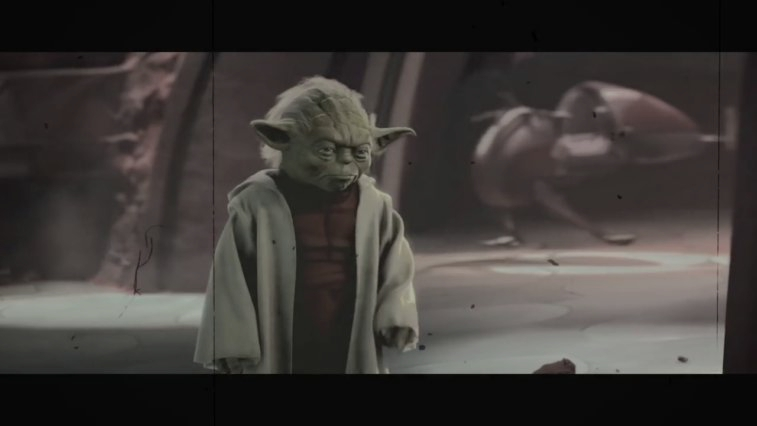

In [240]:
print('Original unmodified still:')

# Loading the original image from the input folder 
tf.keras.utils.load_img(
    'capstone_images/input/0000017477.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)

Modified improved still:


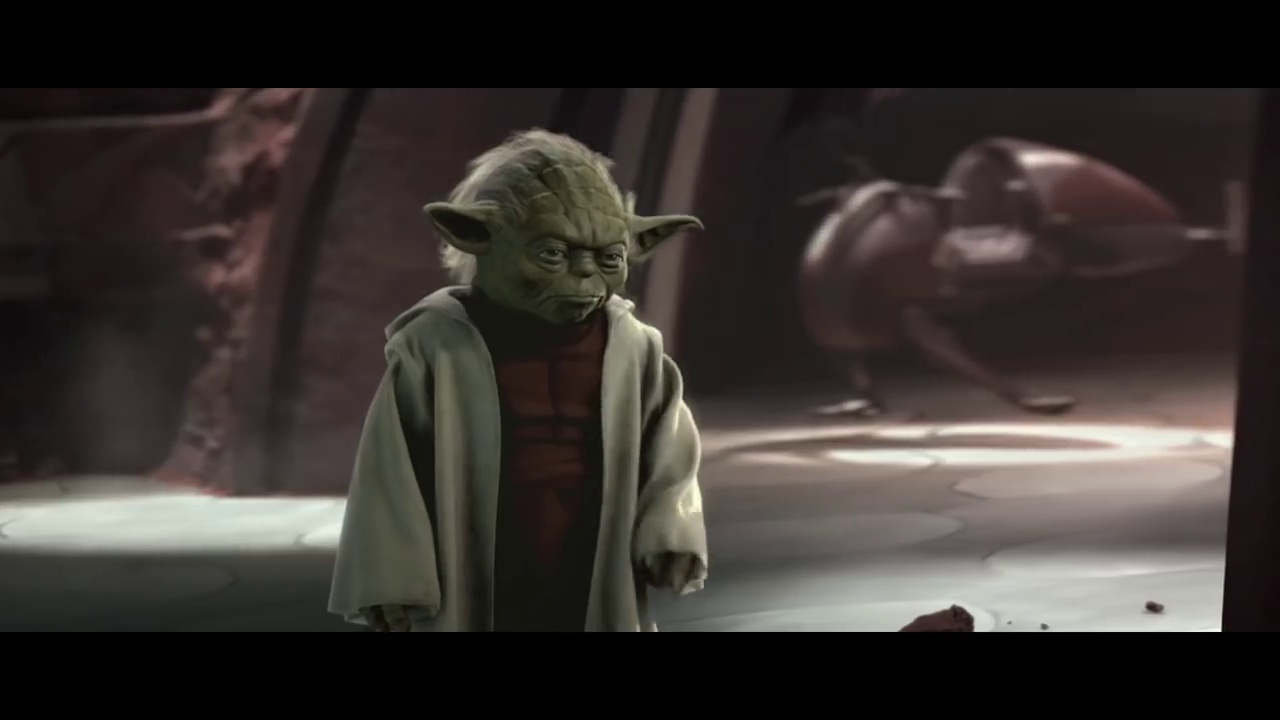

In [241]:
print('Modified improved still:')

# Loading the modified image from the output folder 
tf.keras.utils.load_img(
    'capstone_images/output/0000017477.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest')

As seen in the images above, the colors of the original still looks faded and less vivid and have specks and lines across the image. In the improved version of the image, the colors looks much more vivid and live, while the image is sharper and has no visible damages and defects.

Our goal is use these paired images to train our deep learning models, to hopefully use our model to modifiy and improve old images with structural defects.

## 2.Data Sampling and Spliting

Since it is very computentionally expensive and time consuming to perform the sampling or the train-test split on the actual image files, we will first create CSV files from the file names. We will perform the sampling and train-test splits on the CSV files, and then create new folders and move the images using the "OS module" in python.

In [242]:
# creating an empty list for the name of the images with their directory
images= list()

def getFiles(directory):
    ''' 
    INPUT: a directory
    OUTPUT: a list containing the path of all the image files (.jpg) in that directory
    
    EXAMPLE: if we have a folder containing 5 images with .jpg format and 5 documents with .doc format
    if we feed the directory of the folder to the getFiles function it will return a list containing the path
    to each of the images.
    
    '''
    for file in os.listdir(directory): #'prints a list of names of all the files present in the specified path'
        if file.endswith(".jpg"): #'if the file in the list of names ends with .jpg:'
            images.append(os.path.join(directory, file)) #'it will append path to that file as "directory/name" to the empty list we created'

In [243]:
# we pass the directory path of the input images into the function to get a list of
# the paths to all the input images
getFiles(INPUT)

In [244]:
# create a dataframe from the input image paths
input_df = pd.DataFrame({'input_images': images})

# create a csv file from the dataframe and save the csv file
input_df.to_csv('capstone_images/capstone_input.csv')

In [245]:
# Sanity check - we see that the are not ordered by the image file names
input_df

,input_images
0,capstone_images/input/0000022083.jpg
1,capstone_images/input/0000002353.jpg
2,capstone_images/input/0000012140.jpg
3,capstone_images/input/0000004722.jpg
4,capstone_images/input/0000014531.jpg
...,...
31795,capstone_images/input/0000014528.jpg
31796,capstone_images/input/0000003054.jpg
31797,capstone_images/input/0000015636.jpg
31798,capstone_images/input/0000005425.jpg


In [246]:
# we will sort the dataframe by the image file names and reset the index
input_df = input_df.sort_values(by='input_images').reset_index(drop=True)

# sanity check to see how our dataframe looks like
input_df

,input_images
0,capstone_images/input/0000000000.jpg
1,capstone_images/input/0000000001.jpg
2,capstone_images/input/0000000002.jpg
3,capstone_images/input/0000000003.jpg
4,capstone_images/input/0000000004.jpg
...,...
31795,capstone_images/input/0000031820.jpg
31796,capstone_images/input/0000031821.jpg
31797,capstone_images/input/0000031822.jpg
31798,capstone_images/input/0000031823.jpg


Since we will need the image filenames in the future to move them into their new folders (train, validation or test). We will modify the `input_images` column of our `input_df` dataframe and change them to only the image file names:

In [247]:
# separate the input_image column by '/'
cols_df = input_df['input_images'].str.split('/', expand=True)

# sanity check
cols_df

,0,1,2
0,capstone_images,input,0000000000.jpg
1,capstone_images,input,0000000001.jpg
2,capstone_images,input,0000000002.jpg
3,capstone_images,input,0000000003.jpg
4,capstone_images,input,0000000004.jpg
...,...,...,...
31795,capstone_images,input,0000031820.jpg
31796,capstone_images,input,0000031821.jpg
31797,capstone_images,input,0000031822.jpg
31798,capstone_images,input,0000031823.jpg


In [248]:
# replace the input_images column of the input_df dataframe with cols_df[2] which is the file names
input_df['input_images']=cols_df[2]

#sanity check
input_df

,input_images
0,0000000000.jpg
1,0000000001.jpg
2,0000000002.jpg
3,0000000003.jpg
4,0000000004.jpg
...,...
31795,0000031820.jpg
31796,0000031821.jpg
31797,0000031822.jpg
31798,0000031823.jpg


### Data Sampling

Since our dataset was very large, we decided to perform our modeling on 2%, 12% and 32% of our dataset. In order to do so we needed to sample our dataset and make sure that the paired images are both included in our sampling. We will perform the sampling on the CSV file from the input folder and move the images from both the input and output to new folders based on the filenames in the sampled dataset list.

In [249]:
def data_sample(fraction):
    '''
    INPUT: number between 0 and 1, the fraction of the dataset we want for our sample
    OUTPUT: array of the filenames that belong to the sample data 
    
    Example: if we want 2% of the dataset, we input 0.02 and in return we will get a pandas series containing
    the filenames that belong to the sample dataset
    '''
    sample = input_df.sample(frac=fraction).reset_index(drop=True)
    X = sample['input_images']
    return X

In [250]:
# when we want 2% of our dataset
X = data_sample(0.02)

#sanity check
X

0      0000020433.jpg
1      0000029580.jpg
2      0000027182.jpg
3      0000002905.jpg
4      0000000243.jpg
            ...      
631    0000005762.jpg
632    0000012303.jpg
633    0000028247.jpg
634    0000019255.jpg
635    0000001057.jpg
Name: input_images, Length: 636, dtype: object

In [251]:
# we make two new folders, and name them input_sample_0.02 (since its 2% of our data) and output_sample_0.02
os.mkdir('capstone_images/input_sample_0.02')
os.mkdir('capstone_images/output_sample_0.02')

matches = X.tolist() # we create a variable with a list of the filenames in the sample dataset

for filename in os.listdir('capstone_images/input'): # for all the filenames in the input folder
    if filename in matches: # if the filename matches the filename of the sample dataset
        shutil.move(f'capstone_images/input/{filename}', f'capstone_images/input_sample_0.02/{filename}') #move the file to the new folder we created,input_sample_0.02
        
for filename in os.listdir('capstone_images/output'): # for all the filenames in the output folder
    if filename in matches:  # if the filename matches the filename of the sample dataset
        shutil.move(f'capstone_images/output/{filename}', f'capstone_images/output_sample_0.02/{filename}') #move the file to the new folder we created,output_sample_0.02   

### Train, Validation and Test Split

After we have performed our data sampling, we will split our dataset into train, validation and test data. We allocate 85% of the data to train and validation (remainder) and 15% to test images. We shuffle the inputs to ensure that we have a variaty of images in each of the datasets. Similar to the rest of this notebook, we will perform the split on the CSV files and move the images based on the filenames into their corrresponding folders.

In [252]:
# Splitting the data into remainder (train and validation) and test with 0.85, 0.15 distribution
X_rem, X_test = train_test_split(X, test_size = 0.15, random_state=27, shuffle=True)

In [253]:
# number of remainder images
X_rem.shape

(540,)

In [254]:
# number of test images
X_test.shape

(96,)

We will create new folders for the remainder and test input and output, and move the images by matching them with the list of filenames based on the filenames after performing the train_test split.

In [255]:
# we create new folders for remainder and test input and outputs
os.mkdir('capstone_images/input_rem_0.02')
os.mkdir('capstone_images/input_test_0.02')

os.mkdir('capstone_images/output_rem_0.02')
os.mkdir('capstone_images/output_test_0.02')

matches = X_rem.tolist() # we create a variable with a list of the filenames in the remainder dataset


for filename in os.listdir('capstone_images/input_sample_0.02'): # for all the images in the sample input folder
    if filename in matches: # if the filename matches with the remainder data list
        shutil.move(f'capstone_images/input_sample_0.02/{filename}', f'capstone_images/input_rem_0.02/{filename}') # we will move them into the remainder input folder
    else: # if the filename does not match the remainder data list
        shutil.move(f'capstone_images/input_sample_0.02/{filename}', f'capstone_images/input_test_0.02/{filename}') # we move the images to the test input folder
        
        
for filename in os.listdir('capstone_images/output_sample_0.02'): # for all the images in the sample output folder
    if filename in matches: # if the filename matches with the remainder data list
        shutil.move(f'capstone_images/output_sample_0.02/{filename}', f'capstone_images/output_rem_0.02/{filename}') # we will move them into the remainder output folder
    else: # if the filename does not match the remainder data list
        shutil.move(f'capstone_images/output_sample_0.02/{filename}', f'capstone_images/output_test_0.02/{filename}') # we move the images to the test output folder

We set up the directories for the remainder and test input and output folders. In the next step, we will perform the split on the remainder dataset and set 85% of the images for training and 15% for validation.

In [256]:
# set up directories for remainder and test
INPUT_REM = 'capstone_images/input_rem_0.02'
INPUT_TEST = 'capstone_images/input_test_0.02'

OUTPUT_REM = 'capstone_images/output_rem_0.02'
OUTPUT_TEST = 'capstone_images/output_test_0.02'

In [257]:
# Splitting the remainder data into train and validation with 0.85, 0.15 distribution
X_train, X_val = train_test_split(X_rem, test_size = 0.15, random_state=27, shuffle=True)

In [258]:
# number of train images
X_train.shape

(459,)

In [259]:
# number of validation images
X_val.shape

(81,)

We will create new folders for the train and validation input and output, and move the images by matching them with the list of filenames based on the filenames after performing the train_test split on the remainder dataset.

In [260]:
# we create new folders for train and validation input and outputs
os.mkdir('capstone_images/input_train_0.02')
os.mkdir('capstone_images/input_val_0.02')

os.mkdir('capstone_images/output_train_0.02')
os.mkdir('capstone_images/output_val_0.02')

matches = X_train.tolist() # we create a variable with a list of the filenames in the train dataset

for filename in os.listdir('capstone_images/input_rem_0.02'):  # for all the images in the remainder input folder
    if filename in matches: # if the filename matches with the train data list
        shutil.move(f'capstone_images/input_rem_0.02/{filename}', f'capstone_images/input_train_0.02/{filename}') # we will move them into the train input folder
    else:  # if the filename does not match the train data list
        shutil.move(f'capstone_images/input_rem_0.02/{filename}', f'capstone_images/input_val_0.02/{filename}') # we move the images to the validation input folder


for filename in os.listdir('capstone_images/output_rem_0.02'): # for all the images in the remainder output folder
    if filename in matches: # if the filename matches with the train data list
        shutil.move(f'capstone_images/output_rem_0.02/{filename}', f'capstone_images/output_train_0.02/{filename}') # we will move them into the train output folder
    else: # if the filename does not match the train data list
        shutil.move(f'capstone_images/output_rem_0.02/{filename}', f'capstone_images/output_val_0.02/{filename}') # we move the images to the validation output folder

It is worth mentioning that for the sampling and both the splits we always just used the input folder of the images, and moved both input and output images to their new corresponding folders based on the lists we developed from the input folders. The reason is since the paired images have the same name, we only use one list to ensure that the paired images from both input and output are both included when we create the new sub datasets. 

## 3.Data Cleaning

To ensure that the paired images are both included in the input and output folders of the train, validation and test datasets, we will do cross examinations of the filenames between the input and output folders. If there is not a corresponding paired image with the same name, we will move the image file to a new folder named "Disregard". By doing so, we remove the lone images from our dataset. 

We will set up the directories, for the train and validation datasets. 

We will then create CSV files for each of the paired folders of the train, test and validation images. We will then compare the filenames based on the CSV files for the input and output folders, and disregard the lone images. 

In [261]:
# set up directories for train and validation
INPUT_TRAIN = 'capstone_images/input_train_0.02'
INPUT_VAL = 'capstone_images/input_val_0.02'

OUTPUT_TRAIN = 'capstone_images/output_train_0.02'
OUTPUT_VAL = 'capstone_images/output_val_0.02'

- ### Train data

In [262]:
# empty list for the input train images
images=list()

# we pass the directory path of the input train images into the function to get a list of
# the paths to the input train images
getFiles(INPUT_TRAIN)

In [263]:
# create a dataframe from the input train image paths
input_train = pd.DataFrame({'input_train_0.02': images})

# create a csv file from the dataframe and save the csv file
input_train.to_csv('capstone_images/input_train_0.02.csv')

In [264]:
# Sanity check - we see that the are not ordered by the image file names
input_train

,input_train_0.02
0,capstone_images/input_train_0.02/0000020694.jpg
1,capstone_images/input_train_0.02/0000022732.jpg
2,capstone_images/input_train_0.02/0000031000.jpg
3,capstone_images/input_train_0.02/0000031014.jpg
4,capstone_images/input_train_0.02/0000007773.jpg
...,...
454,capstone_images/input_train_0.02/0000006460.jpg
455,capstone_images/input_train_0.02/0000000777.jpg
456,capstone_images/input_train_0.02/0000013051.jpg
457,capstone_images/input_train_0.02/0000022918.jpg


In [265]:
#we will sort the dataframe by the image file names and reset the index
input_train = input_train.sort_values(by='input_train_0.02').reset_index(drop=True)

# sanity check to see how our dataframe looks like
input_train

,input_train_0.02
0,capstone_images/input_train_0.02/0000000243.jpg
1,capstone_images/input_train_0.02/0000000258.jpg
2,capstone_images/input_train_0.02/0000000356.jpg
3,capstone_images/input_train_0.02/0000000412.jpg
4,capstone_images/input_train_0.02/0000000516.jpg
...,...
454,capstone_images/input_train_0.02/0000031116.jpg
455,capstone_images/input_train_0.02/0000031158.jpg
456,capstone_images/input_train_0.02/0000031485.jpg
457,capstone_images/input_train_0.02/0000031548.jpg


In [266]:
# separate the input_train_0.02 column by '/'
input_train_cols = input_train['input_train_0.02'].str.split('/', expand=True)

# check the dataframe after we separate the columns
input_train_cols

,0,1,2
0,capstone_images,input_train_0.02,0000000243.jpg
1,capstone_images,input_train_0.02,0000000258.jpg
2,capstone_images,input_train_0.02,0000000356.jpg
3,capstone_images,input_train_0.02,0000000412.jpg
4,capstone_images,input_train_0.02,0000000516.jpg
...,...,...,...
454,capstone_images,input_train_0.02,0000031116.jpg
455,capstone_images,input_train_0.02,0000031158.jpg
456,capstone_images,input_train_0.02,0000031485.jpg
457,capstone_images,input_train_0.02,0000031548.jpg


In [267]:
# empty list for the output train images
images=list()

# we pass the directory path of the output train images into the function to get a list of
# the paths to the output train images
getFiles(OUTPUT_TRAIN)

In [268]:
# create a dataframe from the output train image paths
output_train = pd.DataFrame({'output_train_0.02': images})

# create a csv file from the dataframe and save the csv file
output_train.to_csv('capstone_images/output_train_0.02.csv')

In [269]:
# Sanity check - we see that the are not ordered by the image file names
output_train

,output_train_0.02
0,capstone_images/output_train_0.02/0000020694.jpg
1,capstone_images/output_train_0.02/0000022732.jpg
2,capstone_images/output_train_0.02/0000031000.jpg
3,capstone_images/output_train_0.02/0000031014.jpg
4,capstone_images/output_train_0.02/0000007773.jpg
...,...
454,capstone_images/output_train_0.02/0000006460.jpg
455,capstone_images/output_train_0.02/0000000777.jpg
456,capstone_images/output_train_0.02/0000013051.jpg
457,capstone_images/output_train_0.02/0000022918.jpg


In [270]:
#we will sort the dataframe by the image file names and reset the index
output_train = output_train.sort_values(by='output_train_0.02').reset_index(drop=True)

# sanity check to see how our dataframe looks like
output_train

,output_train_0.02
0,capstone_images/output_train_0.02/0000000243.jpg
1,capstone_images/output_train_0.02/0000000258.jpg
2,capstone_images/output_train_0.02/0000000356.jpg
3,capstone_images/output_train_0.02/0000000412.jpg
4,capstone_images/output_train_0.02/0000000516.jpg
...,...
454,capstone_images/output_train_0.02/0000031116.jpg
455,capstone_images/output_train_0.02/0000031158.jpg
456,capstone_images/output_train_0.02/0000031485.jpg
457,capstone_images/output_train_0.02/0000031548.jpg


In [271]:
# separate the output_train_0.02 column by '/'
output_train_cols = output_train['output_train_0.02'].str.split('/', expand=True)

# sanity check
output_train_cols

,0,1,2
0,capstone_images,output_train_0.02,0000000243.jpg
1,capstone_images,output_train_0.02,0000000258.jpg
2,capstone_images,output_train_0.02,0000000356.jpg
3,capstone_images,output_train_0.02,0000000412.jpg
4,capstone_images,output_train_0.02,0000000516.jpg
...,...,...,...
454,capstone_images,output_train_0.02,0000031116.jpg
455,capstone_images,output_train_0.02,0000031158.jpg
456,capstone_images,output_train_0.02,0000031485.jpg
457,capstone_images,output_train_0.02,0000031548.jpg


In [272]:
# create a new folder named disregard to dump the lone images in that folder
os.mkdir('capstone_images/disregard')

# we will now perform the cross examination in 2 for loops
for filename in input_train_cols[2].tolist(): # for the filenames in input train folder
    if filename in output_train_cols[2].tolist(): # if the same file name exists in output train folder
        pass # keep the file in the input folder
    else: # if the same filename does not exist in the output train folder 
        shutil.move(f'capstone_images/input_train_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the input train image to the disregard folder

In [273]:
for filename in output_train_cols[2].tolist(): # for the filenames in output train folder
    if filename in input_train_cols[2].tolist(): # if the same file name exists in input train folder
        pass # keep the file in the output folder
    else: # if the same filename does not exist in the input train folder 
        shutil.move(f'capstone_images/output_train_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the output train image to the disregard folder

We will do the same process as we did for the train input and output folders for the validation and test data images, to ensure the existance of paired images for all the sub folders.

- ### Validation data

In [274]:
# empty list for the input validation images
images=list()

# we pass the directory path of the input validation images into the function to get a list of
# the paths to the input validation images
getFiles(INPUT_VAL)

In [275]:
# create a dataframe from the input validation image paths
input_val = pd.DataFrame({'input_val_0.02': images})

# create a csv file from the dataframe and save the csv file
input_val.to_csv('capstone_images/input_val_0.02.csv')

In [276]:
#we will sort the dataframe by the image file names and reset the index
input_val = input_val.sort_values(by='input_val_0.02').reset_index(drop=True)

#sanity check
input_val

,input_val_0.02
0,capstone_images/input_val_0.02/0000000242.jpg
1,capstone_images/input_val_0.02/0000001025.jpg
2,capstone_images/input_val_0.02/0000001465.jpg
3,capstone_images/input_val_0.02/0000001712.jpg
4,capstone_images/input_val_0.02/0000001717.jpg
...,...
76,capstone_images/input_val_0.02/0000030096.jpg
77,capstone_images/input_val_0.02/0000030348.jpg
78,capstone_images/input_val_0.02/0000030572.jpg
79,capstone_images/input_val_0.02/0000031339.jpg


In [277]:
# separate the input_val_0.02 column by '/'
input_val_cols = input_val['input_val_0.02'].str.split('/', expand=True)

# sanity check
input_val_cols[2]

0     0000000242.jpg
1     0000001025.jpg
2     0000001465.jpg
3     0000001712.jpg
4     0000001717.jpg
           ...      
76    0000030096.jpg
77    0000030348.jpg
78    0000030572.jpg
79    0000031339.jpg
80    0000031438.jpg
Name: 2, Length: 81, dtype: object

In [278]:
# empty list for the output validation images
images=list()

# we pass the directory path of the output validation images into the function to get a list of
# the paths to the output validation images
getFiles(OUTPUT_VAL)

In [279]:
# create a dataframe from the output validation image paths
output_val = pd.DataFrame({'output_val_0.02': images})

# create a csv file from the dataframe and save the csv file
output_val.to_csv('capstone_images/output_val_0.02.csv')

In [280]:
#we will sort the dataframe by the image file names and reset the index
output_val = output_val.sort_values(by='output_val_0.02').reset_index(drop=True)

# sanity check
output_val

,output_val_0.02
0,capstone_images/output_val_0.02/0000000242.jpg
1,capstone_images/output_val_0.02/0000001025.jpg
2,capstone_images/output_val_0.02/0000001465.jpg
3,capstone_images/output_val_0.02/0000001712.jpg
4,capstone_images/output_val_0.02/0000001717.jpg
...,...
76,capstone_images/output_val_0.02/0000030096.jpg
77,capstone_images/output_val_0.02/0000030348.jpg
78,capstone_images/output_val_0.02/0000030572.jpg
79,capstone_images/output_val_0.02/0000031339.jpg


In [281]:
# separate the output_val_0.02 column by '/'
output_val_cols = output_val['output_val_0.02'].str.split('/', expand=True)

# sanity check
output_val_cols

,0,1,2
0,capstone_images,output_val_0.02,0000000242.jpg
1,capstone_images,output_val_0.02,0000001025.jpg
2,capstone_images,output_val_0.02,0000001465.jpg
3,capstone_images,output_val_0.02,0000001712.jpg
4,capstone_images,output_val_0.02,0000001717.jpg
...,...,...,...
76,capstone_images,output_val_0.02,0000030096.jpg
77,capstone_images,output_val_0.02,0000030348.jpg
78,capstone_images,output_val_0.02,0000030572.jpg
79,capstone_images,output_val_0.02,0000031339.jpg


In [283]:
# we will now perform the cross examination for the validation data in 2 for loops
for filename in input_val_cols[2].tolist(): # for the filenames in input val folder
    if filename in output_val_cols[2].tolist():  # if the same file name exists in output val folder
        pass # keep the file in the input folder
    else: # if the same filename does not exist in the output val folder 
        shutil.move(f'capstone_images/input_val_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the input val image to the disregard folder

In [284]:
for filename in output_val_cols[2].tolist(): # for the filenames in output val folder
    if filename in input_val_cols[2].tolist(): # if the same file name exists in input val folder
        pass # keep the file in the input folder
    else: # if the same filename does not exist in the input val folder 
        shutil.move(f'capstone_images/output_val_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the output val image to the disregard folder

- ### Test data

In [285]:
# empty list for the input test images
images=list()

# we pass the directory path of the input test images into the function to get a list of
# the paths to the input test images
getFiles(INPUT_TEST)

In [286]:
# create a dataframe from the input test image paths
input_test = pd.DataFrame({'input_test_0.02': images})

# create a csv file from the dataframe and save the csv file
input_test.to_csv('capstone_images/input_test_0.02.csv')

In [287]:
#we will sort the dataframe by the image file names and reset the index
input_test = input_test.sort_values(by='input_test_0.02').reset_index(drop=True)

# sanity check
input_test

,input_test_0.02
0,capstone_images/input_test_0.02/0000000191.jpg
1,capstone_images/input_test_0.02/0000000290.jpg
2,capstone_images/input_test_0.02/0000000691.jpg
3,capstone_images/input_test_0.02/0000001039.jpg
4,capstone_images/input_test_0.02/0000001456.jpg
...,...
91,capstone_images/input_test_0.02/0000030752.jpg
92,capstone_images/input_test_0.02/0000030993.jpg
93,capstone_images/input_test_0.02/0000031293.jpg
94,capstone_images/input_test_0.02/0000031703.jpg


In [288]:
# separate the input_test_0.02 column by '/'
input_test_cols = input_test['input_test_0.02'].str.split('/', expand=True)

# sanity check
input_test_cols

,0,1,2
0,capstone_images,input_test_0.02,0000000191.jpg
1,capstone_images,input_test_0.02,0000000290.jpg
2,capstone_images,input_test_0.02,0000000691.jpg
3,capstone_images,input_test_0.02,0000001039.jpg
4,capstone_images,input_test_0.02,0000001456.jpg
...,...,...,...
91,capstone_images,input_test_0.02,0000030752.jpg
92,capstone_images,input_test_0.02,0000030993.jpg
93,capstone_images,input_test_0.02,0000031293.jpg
94,capstone_images,input_test_0.02,0000031703.jpg


In [289]:
# empty list for the output test images
images=list()

# we pass the directory path of the output test images into the function to get a list of
# the paths to the output test images
getFiles(OUTPUT_TEST)

In [290]:
# create a dataframe from the output test image paths
output_test = pd.DataFrame({'output_test_0.02': images})

# create a csv file from the dataframe and save the csv file
output_test.to_csv('capstone_images/output_test_0.02.csv')

In [291]:
#we will sort the dataframe by the image file names and reset the index
output_test = output_test.sort_values(by='output_test_0.02').reset_index(drop=True)

# sanity check
output_test

,output_test_0.02
0,capstone_images/output_test_0.02/0000000191.jpg
1,capstone_images/output_test_0.02/0000000290.jpg
2,capstone_images/output_test_0.02/0000000691.jpg
3,capstone_images/output_test_0.02/0000001039.jpg
4,capstone_images/output_test_0.02/0000001456.jpg
...,...
91,capstone_images/output_test_0.02/0000030752.jpg
92,capstone_images/output_test_0.02/0000030993.jpg
93,capstone_images/output_test_0.02/0000031293.jpg
94,capstone_images/output_test_0.02/0000031703.jpg


In [292]:
# separate the output_test_0.02 column by '/'
output_test_cols = output_test['output_test_0.02'].str.split('/', expand=True)

# sanity check
output_test_cols

,0,1,2
0,capstone_images,output_test_0.02,0000000191.jpg
1,capstone_images,output_test_0.02,0000000290.jpg
2,capstone_images,output_test_0.02,0000000691.jpg
3,capstone_images,output_test_0.02,0000001039.jpg
4,capstone_images,output_test_0.02,0000001456.jpg
...,...,...,...
91,capstone_images,output_test_0.02,0000030752.jpg
92,capstone_images,output_test_0.02,0000030993.jpg
93,capstone_images,output_test_0.02,0000031293.jpg
94,capstone_images,output_test_0.02,0000031703.jpg


In [293]:
# we will now perform the cross examination for the test data in 2 for loops
for filename in output_test_cols[2].tolist(): # for the filenames in input test folder
    if filename in input_test_cols[2].tolist(): # if the same file name exists in output test folder
        pass # keep the file in the input folder
    else: # if the same filename does not exist in the output test folder
        shutil.move(f'capstone_images/output_test_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the input test image to the disregard folder

In [294]:
for filename in input_test_cols[2].tolist(): # for the filenames in output test folder
    if filename in output_test_cols[2].tolist(): # if the same file name exists in input test folder
        pass # keep the file in the output folder
    else: # if the same filename does not exist in the intput test folder
        shutil.move(f'capstone_images/input_test_0.02/{filename}', f'capstone_images/disregard/{filename}') # move the output test image to the disregard folder

With the same process as above, we created the sample datasets for 12% and 32% of the dataset as well. And separated the images into train, validation and test data, and cleaned them.

The google drive links for the three sets of sample datasets we created for our modeling are as below:
1. 2% of the dataset: https://drive.google.com/drive/folders/19Q6KfD1kagCj1to-_zWR_RFYoqOC-xqN?usp=sharing
2. 12% of the dataset: https://drive.google.com/file/d/1GvIiE7RYqHZFKYonVhSNAgZoztjcotFG/view?usp=sharing
3. 32% of the dataset: https://drive.google.com/file/d/1l1UriuQwoY0hl1b-Y8MGT2oCseDIf3Vm/view?usp=sharing

## 4.Old Image Test Data

We also have a set of 200 old images that have low resolutions and some structural defects. We downloaded this dataset from Kaggle. The source of the images is Google and they have been manually downloaded from google by the kaggle collaborator.

https://www.kaggle.com/datasets/noobyogi0100/low-resolution-photographs


We would like to test our trained models with these data to see how well our model will perform with a set of actual old images. However, we must make sure that all of our images are accepted by python and tensorflow as we did for our own dataset. We will create a CSV file for the images in the old images dataset and move any images that are not supported to a designated diregard folder.

In [191]:
# directory of the old images we will use for testing
TEST_IMAGE_DATA = 'test_old_images'

In [295]:
# empty list for the test images
images=list()

# we pass the directory path of the old test images into the function to get a list of
# the paths to the old test images
getFiles(TEST_IMAGE_DATA)

In [193]:
# create a dataframe from the old test image paths
test = pd.DataFrame({'test_old_images': images})

# create a csv file from the dataframe and save the csv file
test.to_csv('test_old_images/test_old_images.csv')

In [194]:
# sanity check
test

,test_old_images
0,test_old_images/img119.jpg
1,test_old_images/img131.jpg
2,test_old_images/img125.jpg
3,test_old_images/img22.jpg
4,test_old_images/img36.jpg
...,...
195,test_old_images/img12.jpg
196,test_old_images/img13.jpg
197,test_old_images/img128.jpg
198,test_old_images/img100.jpg


In [195]:
# separate the test_old_images column by '/'
test_cols = test['test_old_images'].str.split('/', expand=True)

# sanity check
test_cols

,0,1
0,test_old_images,img119.jpg
1,test_old_images,img131.jpg
2,test_old_images,img125.jpg
3,test_old_images,img22.jpg
4,test_old_images,img36.jpg
...,...,...
195,test_old_images,img12.jpg
196,test_old_images,img13.jpg
197,test_old_images,img128.jpg
198,test_old_images,img100.jpg


In [236]:
# empty list for the not accepted test images
not_accepted = list()

# we pass the directory into our function to get any images that are not accepted
not_accepted_images(TEST_IMAGE_DATA)

test_old_images/disregard/img146.jpg is not an image
test_old_images/disregard/img41.jpg is not an image
test_old_images/disregard/img179.jpg is not an image
test_old_images/disregard/img47.jpg is a webp, not accepted by TensorFlow
test_old_images/disregard/img180.jpg is a webp, not accepted by TensorFlow
test_old_images/disregard/img195.jpg is not an image
test_old_images/disregard/img198.jpg is not an image
test_old_images/disregard/img61.jpg is not an image
test_old_images/disregard/img49.jpg is a webp, not accepted by TensorFlow
test_old_images/disregard/img65.jpg is a webp, not accepted by TensorFlow
test_old_images/disregard/img71.jpg is not an image
test_old_images/disregard/img112.jpg is not an image


In [237]:
# create a dataframe from the not accpeted old image paths
not_accepted = pd.DataFrame({'not_accepted_images': not_accepted})

# create a csv file from the dataframe and save the csv file
not_accepted.to_csv('test_old_images/not_accepted_images.csv')

In [238]:
# we change the not_accepted_images column into string to be able to split them
not_accepted_cols = not_accepted['not_accepted_images'].astype(str)

# separate the not_accepted_cols column by '/'
not_accepted_cols = not_accepted_cols.str.split('/', expand=True)

In [239]:
# sanity check
not_accepted_cols

,0,1,2
0,test_old_images,disregard,img146.jpg
1,test_old_images,disregard,img41.jpg
2,test_old_images,disregard,img179.jpg
3,test_old_images,disregard,img47.jpg
4,test_old_images,disregard,img180.jpg
5,test_old_images,disregard,img195.jpg
6,test_old_images,disregard,img198.jpg
7,test_old_images,disregard,img61.jpg
8,test_old_images,disregard,img49.jpg
9,test_old_images,disregard,img65.jpg


In [200]:
# create a new folder named disregard to dump the not accepted images in that folder
os.mkdir('test_old_images/disregard')

# we will move the images that are not accepted
for filename in test_cols[1].tolist(): # for the filenames in test old images folder
    if filename in not_accepted_cols[1].tolist(): # if the same file name exists in not accepted list
        shutil.move(f'test_old_images/{filename}', f'test_old_images/disregard/{filename}') # move the test old image to the disregard folder

We moved the 12 images that were not acceptable to the disregard folder and uploaded the accepted old images as a folder to google drive to use them to test our models, the link is as below:

https://drive.google.com/drive/folders/1eEjoHpcHjQnhT2NNHhAjpDd0cbpPABf_?usp=sharing

## Conclusions

- The key point of our dataset is the fact that the images are in pairs and both images need to be fed into our model for training, validation and testing.
- We pass both the input and output images through a function to make sure they are all accepted by python and tensorflow. Fortunately, all our images are acceptable.
- The dataset was too large to be effectively trained by a deep learning model. Therefore, three samples of the dataset with 2%, 12% and 32% of the images are created for our modeling.
- In the first rounds of our modeling, we only created a train and test dataset and relied on the generator to do the validation split for us. However, after training and getting bad results we realized that since two generators were used for the input and output folders, different images were pulled during the validation split. Therefore, the paired images being fed into our model did not match with each other, so we went back and created the validation images with a separate directory to be fed into the its own generator.
- To ensure that all the input and output images are paired, we performed a cross examination on all the subsets of images and disregarded all lone images.
- To further test our models, we downloaded a dataset of old low-resolution images. 
- We pass these images through a function to make sure that all the images are accepted by python and tensorflow. We disregard any images not accepted. 
